In [1]:
# Import dependencies
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Import and Clean Training Dataset

In [2]:
# Read CSV 
data = pd.read_csv('../../../Resources/bio_vars_frame.csv')
data.drop(['Unnamed: 0', 
           'Max Temperature of Warmest Month', 
           'Min Temperature of Coldest Month', 
           'Precipitation of Wettest Month', 
           'Precipitation of Driest Month', 
           'Precipitation Seasonality (Coefficient of Variation)', 
           'Mean Diurnal Range (Mean of monthly (max temp - min temp))', 
           'Temperature Annual Range', 'Annual Mean Temperature', 
           'Isothermality', 
           'Temperature Seasonality', 
           'Annual Precipitation'], axis=1, inplace=True)
data.tail(5)

,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter,raster_frame
1684851,184.0,121.0,190.0,-14.0,126.0,41.0,102.0,80.0,0
1684852,189.0,126.0,196.0,-11.0,120.0,40.0,97.0,75.0,0
1684853,198.0,134.0,205.0,-7.0,110.0,37.0,89.0,67.0,0
1684854,201.0,137.0,208.0,-5.0,105.0,35.0,85.0,63.0,0
1684855,202.0,138.0,209.0,-4.0,105.0,34.0,84.0,62.0,0


# Data Pre-Proccesing 

In [3]:
X = data.drop('raster_frame', axis=1)
y = data['raster_frame']
print(X.shape, y.shape)

(1684856, 8) (1684856,)


In [4]:
# Convert pandas series to np arrays
# Necessary to create StandardScalar 
X = X.values
y = y.values

# Model

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scatter matrix to visualize relationships between input variables

# scatter_df = pd.DataFrame(X_train.sample(n=500), columns= X.columns)
# scatter_matrix = pd.plotting.scatter_matrix(scatter_df, c=y_train.sample(n=500), figsize=(50,50), marker='o')

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scalar = StandardScaler().fit(X_train.reshape(-1,1))

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

## Making Prediciton on Test Dataset

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.988/0.948
k: 3, Train/Test Score: 0.973/0.952
k: 5, Train/Test Score: 0.967/0.953
k: 7, Train/Test Score: 0.964/0.953
k: 9, Train/Test Score: 0.961/0.952
k: 11, Train/Test Score: 0.959/0.952
k: 13, Train/Test Score: 0.958/0.951
k: 15, Train/Test Score: 0.957/0.951
k: 17, Train/Test Score: 0.956/0.950
k: 19, Train/Test Score: 0.955/0.950


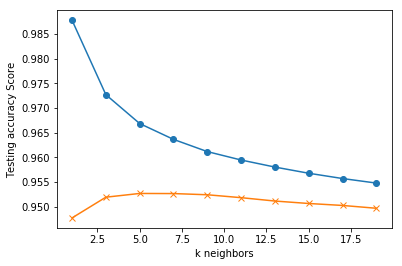

In [10]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Note that k: 19 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test, y_test))

k=19 Test Acc: 0.950


## Importing and Cleaning New Dataset

In [13]:
harsh_2050 = pd.read_csv('../../../Resources/2050_harsh.csv')

In [15]:
harsh_2050.drop(['Unnamed: 0'], axis = 1, inplace = True)
harsh_2050.dropna(axis = 0, how = 'any', inplace = True)
harsh_2050.rename(columns={'bc85bi501': 'Annual Mean Temperature', 
                     'bc85bi502': 'Mean Diurnal Range (Mean of monthly (max temp - min temp))',
                     'bc85bi503': 'Isothermality',
                     'bc85bi504': 'Temperature Seasonality',
                     'bc85bi505': 'Max Temperature of Warmest Month',
                     'bc85bi506': 'Min Temperature of Coldest Month',
                     'bc85bi507': 'Temperature Annual Range',
                     'bc85bi508': 'Mean Temperature of Wettest Quarter',
                     'bc85bi509': 'Mean Temperature of Driest Quarter',
                     'bc85bi5010': 'Mean Temperature of Warmest Quarter',
                     'bc85bi5011': 'Mean Temperature of Coldest Quarter',
                     'bc85bi5012': 'Annual Precipitation',
                     'bc85bi5013': 'Precipitation of Wettest Month',
                     'bc85bi5014': 'Precipitation of Driest Month',
                     'bc85bi5015': 'Precipitation Seasonality (Coefficient of Variation)',
                     'bc85bi5016': 'Precipitation of Wettest Quarter',
                     'bc85bi5017': 'Precipitation of Driest Quarter',
                     'bc85bi5018': 'Precipitation of Warmest Quarter',
                     'bc85bi5019': 'Precipitation of Coldest Quarter',
                    }, inplace=True)

harsh_2050.head()

,x,y,Annual Mean Temperature,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality (Coefficient of Variation),Precipitation of Wettest Quarter,...,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter,Mean Diurnal Range (Mean of monthly (max temp - min temp)),Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter
0,-124.779167,49.3375,109,182,48,1925,361,29,67,916,...,145,839,87,35,5383,259,12,247,56,181
1,-124.770833,49.3375,106,177,47,1944,363,29,67,923,...,148,690,86,35,5286,253,10,243,54,176
2,-124.762500,49.3375,104,176,45,1950,365,30,67,924,...,150,691,86,35,5296,251,8,243,53,175
3,-124.754167,49.3375,111,184,50,1893,354,28,68,902,...,141,825,87,35,5390,262,14,248,58,184
4,-124.745833,49.3375,119,193,54,1849,346,25,69,887,...,132,812,90,35,5524,274,20,254,63,192


In [16]:
X_new = harsh_2050[['Mean Temperature of Wettest Quarter', 
                    'Mean Temperature of Driest Quarter', 
                    'Mean Temperature of Warmest Quarter',
                    'Mean Temperature of Coldest Quarter',
                    'Precipitation of Wettest Quarter',
                    'Precipitation of Driest Quarter',
                    'Precipitation of Warmest Quarter',
                    'Precipitation of Coldest Quarter'
                   ]]
X_new.head(5)

,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
0,56,181,182,48,916,122,145,839
1,54,176,177,47,923,125,148,690
2,53,175,176,45,924,128,150,691
3,58,184,184,50,902,119,141,825
4,63,192,193,54,887,109,132,812


## Making Prediction on New Data

In [17]:
harsh_2050_prediction = knn.predict_proba(X_new)

## Creating Final DataFrame and Exporting 

In [22]:
harsh2050_final_KNN = harsh_2050[['x', 'y']]
harsh2050_final_KNN["Prediction"] = harsh_2050_prediction[:,1]
harsh2050_final_KNN.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
harsh2050_final_KNN['Prediction'].value_counts()

0.000000    14186919
0.052632      174273
0.105263       90606
0.157895       58440
0.210526       43034
0.263158       33480
0.315789       28749
0.368421       21981
0.421053       18145
0.473684       16302
0.526316       13616
0.578947       10733
0.684211        9299
0.631579        9124
0.736842        6234
0.789474        4990
0.842105        3803
0.894737        2517
0.947368        1941
1.000000        1439
Name: Prediction, dtype: int64

In [27]:
harsh2050_final_KNN.to_csv('2050_harsh_final_KNN.csv')